In [1]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
shift_intensity_names = {
    'Validation': 'In-dist.',
    'Shift1': 'Shift 1',
    'Shift2': 'Shift 2',
    'Shift3': 'Shift 3'
}
main_methods = {
    'Base': len(shift_intensity_names),
    'TS': len(shift_intensity_names),
    'MCD': len(shift_intensity_names),
    'DE': len(shift_intensity_names),  
    'MT': len(shift_intensity_names),
    'DS': len(shift_intensity_names),
}
deep_colors = sns.color_palette('deep', n_colors=len(main_methods))
# Generate a color palette with lighter shades for sub-methods
color_palette = []
for (method, count), color in zip(main_methods.items(), deep_colors):
    # Create lighter shades for sub-methods
    lighter_colors = [sns.light_palette(color, n_colors=count+2, reverse=True)[i] for i in range(count)]
    color_palette.extend(lighter_colors)  # Add to the overall palette
print(color_palette)

# Create subplots
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)
        
method_order = ['Base-in', 'Base-1', 'Base-2', 'Base-3', 
                'TS-in', 'TS-1', 'TS-2', 'TS-3', 
                'MCD-in', 'MCD-1', 'MCD-2', 'MCD-3', 
                'DE-in', 'DE-1', 'DE-2', 'DE-3', 
                'MT-in', 'MT-1', 'MT-2', 'MT-3', 
                'DS-in', 'DS-1', 'DS-2', 'DS-3',]
new_l = ['Base', 'Base', 'Base', 'Base', 
         'TS', 'TS', 'TS', 'TS', 
         'MCD', 'MCD', 'MCD', 'MCD', 
         'DE', 'DE', 'DE', 'DE', 
         'MT', 'MT', 'MT', 'MT', 
         'DS', 'DS', 'DS', 'DS',]
metric2y = {
    'Accuracy': 'F-1 (%)',
    'ECE': 'ECE (%)',
    'Correlation': 'Spearman (%)',
}

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.42672459187791223, 0.5463522288226379, 0.7419554162352101), (0.5554099680695499, 0.6456456341158638, 0.7937147540390477), (0.6840953442611876, 0.7449390394090899, 0.8454740918428852), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.8832902324880209, 0.6025176318268312, 0.4451621974757068), (0.899913798309375, 0.6873882048301329, 0.5687557675004331), (0.9165373641307292, 0.7722587778334346, 0.6923493375251595), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.45200523901146406, 0.7170008358657739, 0.5123329133949737), (0.5706771446895949, 0.775178142319783, 0.6168226895350455), (0.6893490503677255, 0.8333554487737922, 0.7213124656751171), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.8045621106049203, 0.433141990336418, 0.4456875856406735), (0.8404967702294485, 0.5604016277316595, 0.5698065438303666), (0.8764314298539767, 0.6876612651269007, 0.6939255020200596), (0.5058

### Method Name Prediction

In [30]:
S = ['Different timelines', 'Different authors', 'Different projects']
# Rename the shift intensity names
shift_intensity_names = {
    'val_acc': 'In-dist.',
    'test1_acc': '1',
    'test2_acc': '2',
    'test3_acc': '3'
}

# res = []
# for shift in SHIFT:
#     for model in MODEL:
#         folder = f'../results/{TASK}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': 'method name prediction',
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc * 100,
#             'test1_acc': test1_acc * 100,
#             'test2_acc': test2_acc * 100,
#             'test3_acc': test3_acc * 100, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

In [ ]:
T = 'Method name prediction'
M = ['code2vec', 'coderoberta', 'graphcodebert']
res = [
    {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 55.390715, 'test1_acc': 54.890607, 'test2_acc': 54.030440, 'test3_acc': 53.241443},
    {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 57.966928, 'test1_acc': 56.587331, 'test2_acc': 56.468104, 'test3_acc': 55.701203},
    {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 59.893170, 'test1_acc': 58.682512, 'test2_acc': 58.427443, 'test3_acc': 57.225624},
    {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 54.485417, 'test1_acc': 52.617400, 'test2_acc': 51.119681, 'test3_acc': 50.704190},
    {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 58.502033, 'test1_acc': 55.334419, 'test2_acc': 53.139589, 'test3_acc': 51.314860},
    {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 59.686326, 'test1_acc': 57.082575, 'test2_acc': 54.806566, 'test3_acc': 53.490697},
    {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 55.254494, 'test1_acc': 51.080404, 'test2_acc': 49.660021, 'test3_acc': 46.890228},
    {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 57.964759, 'test1_acc': 52.417149, 'test2_acc': 51.363183, 'test3_acc': 47.699799},
    {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 59.903500, 'test1_acc': 54.766733, 'test2_acc': 52.318322, 'test3_acc': 49.123829},
]
df = pd.DataFrame(res)

# Melt the dataframe to convert it into the long format
melted_df = pd.melt(
    df, 
    id_vars=['Task', 'Shift type', 'Model'],
    value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
    var_name='Shift intensity', 
    value_name='F-1',
)
melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
    id_vars='Shift type',
    var_name='Shift intensity', 
    value_name='F-1',
)
dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)

plt.figure(figsize=(6, 3.5))
plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1, zorder=0)
# Create the boxplot using seaborn
ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
ax.set_axisbelow(True)

# Plot a line plot with markers for the means
sns.pointplot(
    data=dfm_mean, 
    x='Shift intensity', 
    y='F-1', 
    hue='Shift type', 
    hue_order=['Different timelines', 'Different authors', 'Different projects'],
    errorbar=None,
    dodge=0.35, 
    scale=0.5,
    linestyles='--',
    markers=['x', 'o', '^'],
    # markercolors=['black', 'black', 'black'],
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles[:3], 
    labels=labels[:3], 
    # title="Shift Type",
    # bbox_to_anchor=(1.02, 1.02), 
    # loc='upper left',
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add title and labels to the plot
# plt.xlabel('Shift Intensity')
plt.xlabel('')
plt.ylabel('F-1 (%)')
plt.savefig('../Figure/method_name_prediction.pdf', bbox_inches='tight')

# Show the plot
plt.show()

### Code Completion

In [4]:
S = ['Different timelines', 'Different authors', 'Different projects']
T = 'code_completion'
M = ['lstm', 'codebert', 'codegpt']
res = []

# for shift in S:
#     for model in M:
#         folder = f'../results/{T}/{shift}/{model}/checkpoints'
#         ckpt = os.listdir(folder)[-1]
#         file = os.path.join(folder, ckpt, 'parameters.txt')
#         val_acc, test1_acc, test2_acc, test3_acc = get_vars(file)
#         outputs = {
#             'Task': T,
#             'Shift type': shift,
#             'Model': model,
#             'val_acc': val_acc,
#             'test1_acc': test1_acc,
#             'test2_acc': test2_acc,
#             'test3_acc': test3_acc, 
#         }
#         res.append(outputs)

# df = pd.DataFrame(res)
# df

In [5]:
# T = 'Code completion'
# M = ['code2vec', 'coderoberta', 'graphcodebert']
# res = [
#     {'Task': T, 'Shift type': S[0], 'Model': M[0], 'val_acc': 73.017380, 'test1_acc': 73.116398, 'test2_acc': 73.028721, 'test3_acc': 72.855602},
#     {'Task': T, 'Shift type': S[0], 'Model': M[1], 'val_acc': 68.204422, 'test1_acc': 67.246265, 'test2_acc': 66.639973, 'test3_acc': 66.166599},
#     {'Task': T, 'Shift type': S[0], 'Model': M[2], 'val_acc': 77.361252, 'test1_acc': 76.465508, 'test2_acc': 75.276009, 'test3_acc': 74.238998},
#     {'Task': T, 'Shift type': S[1], 'Model': M[0], 'val_acc': 72.099663, 'test1_acc': 71.724686, 'test2_acc': 71.069344, 'test3_acc': 70.267476},
#     {'Task': T, 'Shift type': S[1], 'Model': M[1], 'val_acc': 67.453468, 'test1_acc': 67.843483, 'test2_acc': 66.930634, 'test3_acc': 66.185692},
#     {'Task': T, 'Shift type': S[1], 'Model': M[2], 'val_acc': 77.705154, 'test1_acc': 76.007880, 'test2_acc': 74.766647, 'test3_acc': 72.389117},
#     {'Task': T, 'Shift type': S[2], 'Model': M[0], 'val_acc': 73.762337, 'test1_acc': 71.416771, 'test2_acc': 66.682344, 'test3_acc': 64.095497},
#     {'Task': T, 'Shift type': S[2], 'Model': M[1], 'val_acc': 64.935867, 'test1_acc': 62.546444, 'test2_acc': 59.457111, 'test3_acc': 57.590852},
#     {'Task': T, 'Shift type': S[2], 'Model': M[2], 'val_acc': 78.047554, 'test1_acc': 73.819000, 'test2_acc': 68.419258, 'test3_acc': 67.348854},
# ]

# df = pd.DataFrame(res)
# # Rename the shift intensity names
# shift_intensity_names = {
#     'val_acc': 'In-dist.',
#     'test1_acc': '1',
#     'test2_acc': '2',
#     'test3_acc': '3'
# }

# # Melt the dataframe to convert it into the long format
# melted_df = pd.melt(
#     df, 
#     id_vars=['Task', 'Shift type', 'Model'],
#     value_vars=['val_acc', 'test1_acc', 'test2_acc', 'test3_acc'],
#     var_name='Shift intensity', 
#     value_name='F-1',
# )
# melted_df['Shift intensity'] = melted_df['Shift intensity'].map(shift_intensity_names)

# dfm_mean = df.groupby('Shift type', as_index=False).mean().melt(
#     id_vars='Shift type',
#     var_name='Shift intensity', 
#     value_name='F-1',
# )
# dfm_mean['Shift intensity'] = dfm_mean['Shift intensity'].map(shift_intensity_names)


# plt.figure(figsize=(6, 3.5))
# plt.grid(True, color='#DDDDDD', linestyle='--', linewidth=1)
# # Create the boxplot using seaborn
# ax = sns.boxplot(data=melted_df, x='Shift intensity', y='F-1', hue='Shift type', width=0.5, linewidth=1.2)
# ax.set_axisbelow(True)

# # Plot a line plot with markers for the means
# sns.pointplot(
#     data=dfm_mean, 
#     x='Shift intensity', 
#     y='F-1', 
#     hue='Shift type', 
#     hue_order=['Different timelines', 'Different authors', 'Different projects'],
#     errorbar=None,
#     dodge=0.35, 
#     scale=0.5,
#     linestyles='--',
#     markers=['x', 'o', '^'],
# )

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(
#     handles=handles[:3], 
#     labels=labels[:3], 
#     # title="Shift Type",
#     # bbox_to_anchor=(1.02, 1.02), 
#     # loc='upper left',
# )
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # Add title and labels to the plot
# plt.xlabel('Shift Intensity')
# plt.ylabel('F-1 (%)')
# plt.savefig('../Figure/code_completion.pdf', bbox_inches='tight')

# # Show the plot
# plt.show()

In [6]:
import os
import torch

metric = 'acc'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ...,  True,  True,  True]), 'dev': array([ True,  True,  True, ...,  True,  True, False]), 'test1': array([ True,  True,  True, ...,  True, False,  True]), 'test2': array([ True,  True, False, ..., False,  True, False]), 'test3': array([ True,  True, False, ..., False,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.592575192451477]
ModelWithTemperature acc:  [0.592575192451477]
ModelActivateDropout acc:  [0.592575192451477]
Ensemble acc:  [0.7470042109489441]
PVScore acc:  [0.13386982679367065]
Mutation acc:  [0.582163393497467, 0.592575192451477, 0.5897262692451477, 0.5904017686843872]
 -- test1 set -- 
Vanilla acc:  [0.6187321543693542]
ModelWithTemperature acc:  [0.6187321543693542]
ModelActivateDropout acc:  [0.6187321543693542]
Ensemble acc:  [0.7863444685935974]
PVScore acc:  [0.20095650851726532]
Mutation acc:  [0.6052014231681824, 0.6187321543693542, 0.6143060922622681, 0.6163111925125122]
 -- test2 set -- 
Vanilla acc:  [0.61840277910232

In [8]:
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.6476221680641174]
ModelWithTemperature acc:  [0.6476221680641174]
ModelActivateDropout acc:  [0.6476221680641174]
Ensemble acc:  [0.7818281650543213]
PVScore acc:  [0.13650380074977875]
Mutation acc:  [0.6380455493927002, 0.6476221680641174, 0.6398244500160217, 0.6405656933784485]
 -- test1 set -- 
Vanilla acc:  [0.6804746985435486]
ModelWithTemperature acc:  [0.6804746985435486]
ModelActivateDropout acc:  [0.6804746985435486]
Ensemble acc:  [0.7779461145401001]
PVScore acc:  [0.17780296504497528]
Mutation acc:  [0.6738311052322388, 0.6804746985435486, 0.6697280406951904, 0.6778506636619568]
 -- test2 set -- 
Vanilla acc:  [0.6576111316680908]
ModelWithTemperature acc:  [0.6576111316680908]
ModelActivateDropout acc:  [0.6576111316680908]
Ensemble acc:  [0.7471286058425903]
PVScore acc:  [0.14935113489627838]
Mutation acc:  [0.6458830833435059, 0.6576111316680908, 0.6464797258377075, 0.6549634337425232]
 -- test3 set -- 
Vanilla acc:  [0.6545716524124146

In [9]:
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.7297183275222778]
ModelWithTemperature acc:  [0.7297183275222778]
ModelActivateDropout acc:  [0.7297183275222778]
Ensemble acc:  [0.8322715163230896]
PVScore acc:  [0.18401196599006653]
Mutation acc:  [0.7256014943122864, 0.7297183275222778, 0.7224041223526001, 0.7268531918525696]
 -- test1 set -- 
Vanilla acc:  [0.7276836633682251]
ModelWithTemperature acc:  [0.7276836633682251]
ModelActivateDropout acc:  [0.7276836633682251]
Ensemble acc:  [0.8506984114646912]
PVScore acc:  [0.18190841376781464]
Mutation acc:  [0.7256055474281311, 0.7276836633682251, 0.7192570567131042, 0.727747917175293]
 -- test2 set -- 
Vanilla acc:  [0.7143267393112183]
ModelWithTemperature acc:  [0.7143267393112183]
ModelActivateDropout acc:  [0.7143267393112183]
Ensemble acc:  [0.8254634141921997]
PVScore acc:  [0.1690155267715454]
Mutation acc:  [0.7104907035827637, 0.7143267393112183, 0.709597110748291, 0.7114034295082092]
 -- test3 set -- 
Vanilla acc:  [0.7369104623794556]
M

### ECE

In [10]:
SHIFT = 'different_time'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ...,  True,  True,  True]), 'dev': array([ True,  True,  True, ...,  True,  True, False]), 'test1': array([ True,  True,  True, ...,  True, False,  True]), 'test2': array([ True,  True, False, ..., False,  True, False]), 'test3': array([ True,  True, False, ..., False,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.036642443388700485]
ModelWithTemperature acc:  [0.11932069063186646]
ModelActivateDropout acc:  [0.03664243221282959]
Ensemble acc:  [0.05133862793445587]
PVScore acc:  [0.1337047517299652]
Mutation acc:  [0.04183315113186836, 0.049946531653404236, 0.045085757970809937, 0.04311602935194969]
 -- test1 set -- 
Vanilla acc:  [0.04144461452960968]
ModelWithTemperature acc:  [0.09364546835422516]
ModelActivateDropout acc:  [0.0414445623755455]
Ensemble acc:  [0.06580986827611923]
PVScore acc:  [0.2007914036512375]
Mutation acc:  [0.06013675779104233, 0.025139618664979935, 0.017579475417733192, 0.015427002683281898]
 -- test2 set -- 
Vanilla

In [11]:
SHIFT = 'different_project'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True, False, ..., False,  True,  True]), 'dev': array([False,  True,  True, ..., False,  True,  True]), 'test1': array([ True,  True,  True, ...,  True,  True,  True]), 'test2': array([ True,  True, False, ...,  True, False,  True]), 'test3': array([False,  True, False, ...,  True,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.03160117194056511]
ModelWithTemperature acc:  [0.10666804015636444]
ModelActivateDropout acc:  [0.03160116821527481]
Ensemble acc:  [0.08741916716098785]
PVScore acc:  [0.13621625304222107]
Mutation acc:  [0.032677970826625824, 0.048590876162052155, 0.033348482102155685, 0.03608579561114311]
 -- test1 set -- 
Vanilla acc:  [0.062115129083395004]
ModelWithTemperature acc:  [0.07830492407083511]
ModelActivateDropout acc:  [0.0621151365339756]
Ensemble acc:  [0.11435123533010483]
PVScore acc:  [0.17751544713974]
Mutation acc:  [0.04668383672833443, 0.054844148457050323, 0.05259249359369278, 0.06087087094783783]
 -- test2 set -- 
Vanilla a

In [12]:
SHIFT = 'different_author'
metric = 'ece'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([ True,  True,  True, ...,  True,  True, False]), 'dev': array([ True,  True,  True, ...,  True,  True,  True]), 'test1': array([ True,  True,  True, ...,  True,  True,  True]), 'test2': array([ True,  True,  True, ...,  True, False,  True]), 'test3': array([ True,  True,  True, ...,  True,  True,  True])}
 -- dev set -- 
Vanilla acc:  [0.05724051594734192]
ModelWithTemperature acc:  [0.056818507611751556]
ModelActivateDropout acc:  [0.05724051594734192]
Ensemble acc:  [0.037691518664360046]
PVScore acc:  [0.18297262489795685]
Mutation acc:  [0.03358964994549751, 0.013067685067653656, 0.046182408928871155, 0.01987786591053009]
 -- test1 set -- 
Vanilla acc:  [0.056235171854496]
ModelWithTemperature acc:  [0.056480295956134796]
ModelActivateDropout acc:  [0.056235171854496]
Ensemble acc:  [0.03307449817657471]
PVScore acc:  [0.18086905777454376]
Mutation acc:  [0.03770850598812103, 0.013472910039126873, 0.04921828582882881, 0.02931039221584797]
 -- test2 set -- 
Vanilla 

In [127]:
# Keep .4f precision
df[(df['shift'] == 'different_author') & (df['split'] == 'Shift 3')].correlation.to_numpy().round(4) + 30

array([30.0333, 30.1206, 30.0331, 30.1699, 29.9316, 30.1157])

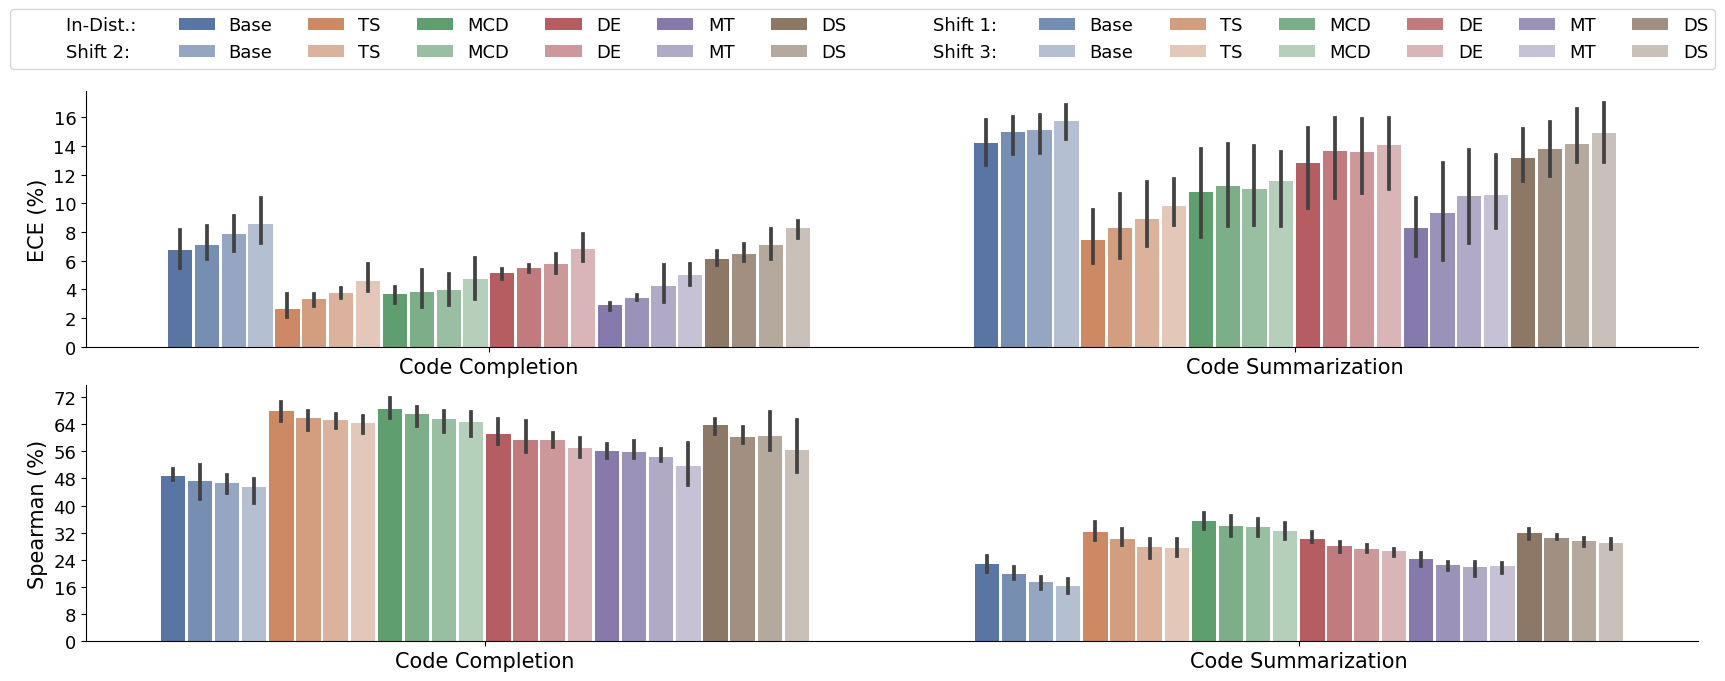

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define the data as a dictionary
data = {
    'split': (['In-dist.'] * 6 + ['Shift 1'] * 6 + ['Shift 2'] * 6 + ['Shift 3'] * 6) * 3 * 2,
    'Accuracy': [
        71.87, 71.84, 73.54, 72.60, 72.02, 72.92, # CC-time-In-dist
        71.84, 71.84, 72.68, 71.74, 71.84, 71.31, # CC-time-Shift 1
        69.25, 69.25, 71.38, 71.30, 69.28, 69.50, # CC-time-Shift 2
        67.46, 67.46, 69.40, 70.64, 68.47, 67.51, # CC-time-Shift 3
        68.05, 68.05, 69.79, 70.18, 68.14, 68.98, # CC-project-In-dist
        65.76, 65.76, 65.81, 67.79, 65.77, 65.79, # CC-project-Shift 1
        65.46, 65.46, 65.60, 66.71, 65.54, 65.36, # CC-project-Shift 2
        64.76, 64.76, 64.82, 65.70, 64.96, 64.70, # CC-project-Shift 3
        73.69, 73.69, 74.27, 75.07, 73.75, 73.63, # CC-author-In-dist
        72.97, 72.97, 73.95, 74.71, 73.11, 72.99, # CC-author-Shift 1
        72.77, 72.77, 72.84, 73.23, 73.08, 72.64, # CC-author-Shift 2
        71.43, 71.43, 71.52, 72.55, 71.49, 71.55, # CC-author-Shift 3
        48.04, 48.04, 48.83, 49.58, 48.20, 48.30, # CS-time-In-dist
        47.82, 47.82, 48.57, 49.54, 47.95, 48.42, # CS-time-Shift 1
        46.98, 46.98, 47.87, 48.66, 47.14, 48.27, # CS-time-Shift 2
        46.89, 46.89, 47.38, 48.63, 47.24, 47.51, # CS-time-Shift 3
        53.64, 53.64, 54.53, 54.46, 54.12, 53.46, # CS-project-In-dist
        52.86, 52.86, 54.13, 53.44, 53.02, 52.39, # CS-project-Shift 1
        48.63, 48.63, 49.12, 49.91, 48.65, 48.69, # CS-project-Shift 2
        46.84, 46.84, 47.24, 48.80, 47.99, 46.92, # CS-project-Shift 3
        50.94, 50.94, 51.87, 51.77, 50.95, 51.02, # CS-author-In-dist
        49.32, 49.32, 50.29, 49.99, 49.37, 49.43, # CS-author-Shift 1
        48.13, 48.13, 48.30, 47.74, 48.14, 48.24, # CS-author-Shift 2
        44.50, 44.50, 44.52, 45.23, 44.54, 44.57  # CS-author-Shift 3
    ], 
    'ECE': [
        8.16, 2.10, 3.76, 5.21, 3.08, 6.66, # CC-time-in-dist
        8.44, 2.82, 2.75, 5.69, 3.26, 7.14, # CC-time-shift1
        9.10, 3.42, 2.93, 5.13, 3.14, 8.21, # CC-time-shift2
        10.36, 3.91, 3.36, 6.58, 4.33, 8.77, # CC-time-shift3
        6.66, 2.19, 4.16, 4.74, 2.60, 5.70, # CC-project-in-dist
        6.15, 3.44, 5.34, 5.21, 3.63, 5.98, # CC-project-shift1
        6.71, 4.10, 5.10, 6.44, 5.73, 6.98, # CC-project-shift2
        7.21, 5.75, 6.19, 7.86, 5.76, 8.53, # CC-project-shift3
        5.47, 3.65, 3.08, 5.43, 3.09, 6.10, # CC-author-in-dist
        6.62, 3.68, 3.39, 5.57, 3.31, 6.29, # CC-author-shift1
        7.72, 3.70, 3.77, 5.68, 3.93, 6.09, # CC-author-shift2
        8.09, 4.08, 4.63, 6.01, 4.92, 7.57, # CC-author-shift3
        15.83, 9.53, 13.76, 15.22, 10.36, 11.57, # CS-time-in-dist 
        16.0, 10.63, 14.11, 15.94, 12.83, 11.91, # CS-time-shift1
        16.18, 11.47, 13.97, 15.85, 13.71, 12.89, # CS-time-shift2
        16.85, 11.69, 13.57, 15.94, 13.35, 12.85, # CS-time-shift3 
        12.69, 6.97, 10.94, 9.66, 8.16, 12.78, # CS-project-in-dist
        13.42, 8.08, 11.18, 10.35, 9.19, 13.78, # CS-project-shift1 
        13.52, 8.23, 10.58, 10.7, 10.61, 13.01, # CS-project-shift2
        14.5, 9.31, 12.60, 11.0, 10.11, 14.91, # CS-project-shift3
        14.12, 5.83, 7.65, 13.62, 6.35, 15.2, # CS-author-in-dist
        15.44, 6.22, 8.4, 14.68, 6.05, 15.64, # CS-author-shift1
        15.6, 7.01, 8.48, 14.16, 7.22, 16.55, # CS-author-shift2
        15.94, 8.48, 8.45, 15.23, 8.31, 16.97, # CS-author-shift3
    ],
    'Correlation': [
        47.6510, 70.5971, 71.8362, 65.4661, 55.8159, 64.3759, # CC-time-in-dist
        51.8362, 67.7464, 68.9336, 64.7785, 54.5705, 58.9006, # CC-time-shift1
        48.9337, 65.6248, 67.8842, 63.1858, 53.4804, 56.2654, # CC-time-shift2
        47.8842, 64.8512, 65.6510, 60.0339, 45.9462, 50.0377, # CC-time-shift3
        50.7758, 64.9028, 65.7758, 60.1414, 54.0516, 61.0901, # CC-project-in-dist
        41.7883, 62.3612, 63.5838, 57.2604, 53.9508, 58.3380, # CC-project-time-shift1
        43.5838, 62.9270, 61.7883, 57.1399, 53.1245, 58.1258, # CC-project-time-shift2
        40.6084, 61.4729, 60.6084, 54.1862, 50.3723, 53.3989, # CC-project-time-shift3
        47.8147, 68.2049, 67.8147, 58.0110, 58.1407, 65.3988, # CC-author-in-dist
        48.4740, 67.6457, 68.4741, 55.7600, 58.9231, 63.1481, # CC-author-time-shift1
        47.2463, 67.1192, 67.2463, 57.8720, 56.6548, 67.4689, # CC-author-time-shift2
        47.6594, 66.4288, 67.6593, 56.4535, 58.3215, 65.3561, # CC-author-time-shift3
        22.9533, 31.8720, 37.9176, 32.1748, 22.1492, 33.1741, # CS-time-in-dist
        18.9460, 29.2636, 37.0106, 29.1918, 21.1531, 31.1767, # CS-time-shift1
        17.9742, 28.8866, 35.9358, 26.194 , 19.1619, 28.1673, # CS-time-shift2
        19.9851, 26.9056, 34.9545, 25.2123, 20.1381, 27.1612, # CS-time-shift3
        20.3317, 29.8321, 35.3485, 29.3473, 26.1473, 32.2550, # CS-project-in-dist
        18.2973, 28.5212, 34.2982, 26.3009, 23.1441, 30.2225, # CS-project-time-shift1
        15.3226, 24.4319, 34.3281, 28.3535, 23.3104, 30.5153, # CS-project-time-shift2
        14.2493, 25.2594, 32.2496, 27.2421, 23.2169, 29.9422, # CS-project-time-shift3
        25.0186, 35.1224, 33.0177, 29.1698, 24.0411, 30.1315, # CS-author-in-dist
        22.0028, 33.0716, 31.0018, 28.7431, 23.3772, 30.1445, # CS-author-time-shift1
        18.9861, 30.0835, 30.9845, 27.1319, 23.0300, 30.1270, # CS-author-time-shift2
        15.0333, 30.1206, 30.0331, 27.1699, 22.9316, 30.1157, # CS-author-time-shift3
    ],
    'Task': ['Code Completion'] * 6 * 12 + ['Code Summarization'] * 6 * 12,
    'method': (['Base-in', 'TS-in', 'MCD-in', 'DE-in', 'MT-in', 'DS-in'] + ['Base-1', 'TS-1', 'MCD-1', 'DE-1', 'MT-1', 'DS-1'] + ['Base-2', 'TS-2', 'MCD-2', 'DE-2', 'MT-2', 'DS-2'] + ['Base-3', 'TS-3', 'MCD-3', 'DE-3', 'MT-3', 'DS-3']) * 3 * 2,
    'shift': (['different_time'] * 24 + ['different_project'] * 24 + ['different_author'] * 24) * 2
}
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create subplots
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)
        
method_order = ['Base-in', 'Base-1', 'Base-2', 'Base-3', 
                'TS-in', 'TS-1', 'TS-2', 'TS-3', 
                'MCD-in', 'MCD-1', 'MCD-2', 'MCD-3', 
                'DE-in', 'DE-1', 'DE-2', 'DE-3', 
                'MT-in', 'MT-1', 'MT-2', 'MT-3', 
                'DS-in', 'DS-1', 'DS-2', 'DS-3',]
new_l = ['Base', 'Base', 'Base', 'Base', 
         'TS', 'TS', 'TS', 'TS', 
         'MCD', 'MCD', 'MCD', 'MCD', 
         'DE', 'DE', 'DE', 'DE', 
         'MT', 'MT', 'MT', 'MT', 
         'DS', 'DS', 'DS', 'DS',]
metric2y = {
    'Accuracy': 'Accuracy (%)',
    'ECE': 'ECE (%)',
    'Correlation': 'Spearman (%)',
}

# Use deep color palette
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.set_palette('deep')

# Follow the order of the method_order
for i, metric in enumerate(['ECE', 'Correlation']):
    sns.barplot(data=df, x='Task', y=metric, hue='method', hue_order=method_order, palette=color_palette, ax=axs[i])
    # Do not show top and right frame lines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_xticklabels(['Code Completion', 'Code Summarization'], fontsize=15)
    axs[i].set_ylabel(metric2y[metric], fontsize=15)
    axs[i].tick_params(axis='y', labelsize=13) # modify yticks fontsize
    axs[i].get_legend().remove() # remove legend
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True)) # keep only integer yticks
    width_changer(axs[i], .03)

new_l = (['Base'] * 2 + ['TS'] * 2 + ['MCD'] * 2 + ['DE'] * 2 + ['MT'] * 2 + ['DS'] * 2) * 2
h, l = axs[0].get_legend_handles_labels()  # Get handles and labels from the last subplot in the first row
ph = [plt.plot([], marker="", ls="")[0]]*4
handles = ph[:2] + h[::2] + ph[2:] + h[1::2]  # Split the handles for two rows 
labels = ["In-Dist.: "] + ["Shift 2: "] + new_l[:12] + \
         ["Shift 1: "] + ["Shift 3: "] + new_l[12:]  # Split the labels for two rows
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.50, 0.98), ncol=14, fontsize=13)
for vpack in leg._legend_handle_box.get_children()[:2]:  # Adjust the handle length in two rows
    for hpack in vpack.get_children():
        hpack.get_children()[0].set_width(25)
# ph = [plt.plot([], marker="", ls="")[0]]*4
# handles = ph + h
# labels = ["In-Distribution: ", "Shift 1: ", "Shift 2: ", "Shift 3: "] + new_l
# leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.51, 1.16), ncol=7, fontsize=13)
# for vpack in leg._legend_handle_box.get_children()[:1]:
#     for hpack in vpack.get_children():
#         hpack.get_children()[0].set_width(0)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for the legend
plt.savefig('../Figure/calibration.pdf', bbox_inches='tight')
plt.show()

In [44]:
h[0:]

[<BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>,
 <BarContainer object of 2 artists>]

### Correlation

In [92]:
import os
import torch
from scipy.stats import spearmanr

metric = 'rank_correlation'
# truth = torch.load(os.path.join(dir, 'truth.res'))
res = []
split2label = {
    'dev': 'In-dist.',
    'test1': 'Shift 1',
    'test2': 'Shift 2',
    'test3': 'Shift 3',
}

for SHIFT in ['different_time', 'different_author', 'different_project']:
    dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
    for split in ['dev', 'test1', 'test2', 'test3']:
        # print(f" -- {split} set -- ")
        vanilla = torch.load(os.path.join(dir, 'Vanilla.res'))
        # print(f'{metric}: ', vanilla[split][metric])
        res.append({'split': split2label[split], 'correlation': vanilla[split][metric][0], 'method': 'Base', 'shift': SHIFT})
        temp_scale = torch.load(os.path.join(dir, 'ModelWithTemperature.res'))
        # print(f'{metric}: ', temp_scale[split][metric])
        res.append({'split': split2label[split], 'correlation': temp_scale[split][metric][0], 'method': 'TS', 'shift': SHIFT})
        mcd = torch.load(os.path.join(dir, 'ModelActivateDropout.res'))
        # rank_correlation, _ = spearmanr(mcd[split]['UE_scores'][0], mcd[split]['truths'][0])
        res.append({'split': split2label[split], 'correlation': mcd[split][metric][0], 'method': 'MCD', 'shift': SHIFT})
        # print(f'{metric}: ', rank_correlation)
        # res.append({'split': split2label[split], 'correlation': rank_correlation, 'method': 'MCD', 'shift': SHIFT})
        ensemble = torch.load(os.path.join(dir, 'Ensemble.res'))
        res.append({'split': split2label[split], 'correlation': ensemble[split][metric][0], 'method': 'DE', 'shift': SHIFT})
        mt = torch.load(os.path.join(dir, 'Mutation.res'))
        ranks = []
        for ue, truth in zip(mt[split]['UE_scores'], mt[split]['truths']):
            rank_correlation, _ = spearmanr(ue, truth)
            ranks.append(rank_correlation)
        # print(f'{metric}: ', max(ranks))
        res.append({'split': split2label[split], 'correlation': max(ranks), 'method': 'MT', 'shift': SHIFT})
        pv = torch.load(os.path.join(dir, 'PVScore.res'))
        res.append({'split': split2label[split], 'correlation': pv[split][metric][0], 'method': 'DS', 'shift': SHIFT})

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


/home/yli927/anaconda3/envs/pipefisher/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [106]:
# CS
metric = 'rank_correlation'
res = []
split2label = {
    'dev': 'In-dist.',
    'test1': 'Shift 1',
    'test2': 'Shift 2',
    'test3': 'Shift 3',
}

for SHIFT in ['different_time', 'different_author', 'different_project']:
    dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
    for split in ['dev', 'test1', 'test2', 'test3']:
        # print(f" -- {split} set -- ")
        vanilla = torch.load(os.path.join(dir, 'Vanilla.res'))
        # print(f'{metric}: ', vanilla[split][metric])
        res.append({'split': split2label[split], 'correlation': vanilla[split][metric][0], 'method': 'Base', 'shift': SHIFT})
        temp_scale = torch.load(os.path.join(dir, 'ModelWithTemperature.res'))
        # print(f'{metric}: ', temp_scale[split][metric])
        res.append({'split': split2label[split], 'correlation': temp_scale[split][metric][0], 'method': 'TS', 'shift': SHIFT})
        mcd = torch.load(os.path.join(dir, 'ModelActivateDropout.res'))
        # rank_correlation, _ = spearmanr(mcd[split]['UE_scores'][0], mcd[split]['truths'][0])
        res.append({'split': split2label[split], 'correlation': mcd[split][metric][0], 'method': 'MCD', 'shift': SHIFT})
        # print(f'{metric}: ', rank_correlation)
        # res.append({'split': split2label[split], 'correlation': rank_correlation, 'method': 'MCD', 'shift': SHIFT})
        ensemble = torch.load(os.path.join(dir, 'Ensemble.res'))
        res.append({'split': split2label[split], 'correlation': ensemble[split][metric][0], 'method': 'DE', 'shift': SHIFT})
        mt = torch.load(os.path.join(dir, 'Mutation.res'))
        ranks = []
        for ue, truth in zip(mt[split]['UE_scores'], mt[split]['truths']):
            rank_correlation, _ = spearmanr(ue, truth)
            ranks.append(rank_correlation)
        # print(f'{metric}: ', max(ranks))
        res.append({'split': split2label[split], 'correlation': max(ranks), 'method': 'MT', 'shift': SHIFT})
        pv = torch.load(os.path.join(dir, 'PVScore.res'))
        res.append({'split': split2label[split], 'correlation': pv[split][metric][0], 'method': 'DS', 'shift': SHIFT})
        
df = pd.DataFrame(res)
df

/home/yli927/anaconda3/envs/pipefisher/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,split,correlation,method,shift
0,In-dist.,-0.046623,Base,different_time
1,In-dist.,-0.127959,TS,different_time
2,In-dist.,-0.082321,MCD,different_time
3,In-dist.,0.174888,DE,different_time
4,In-dist.,0.149238,MT,different_time
...,...,...,...,...
67,Shift 3,NaN,TS,different_project
68,Shift 3,0.249632,MCD,different_project
69,Shift 3,0.242081,DE,different_project
70,Shift 3,0.216899,MT,different_project


/tmp/ipykernel_2010416/874530795.py:74: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


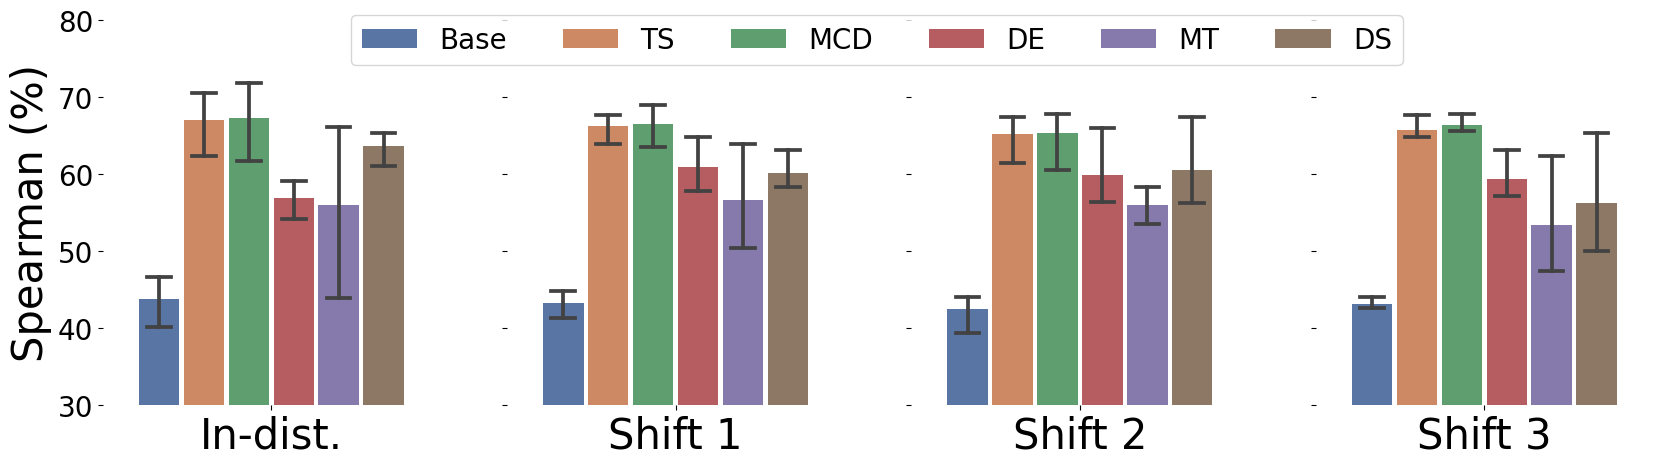

In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import bootstrap

df = pd.DataFrame(res)
df['correlation'] *= 100  # Scale to percentage for plotting
df.loc[df['method'] == 'Base', 'correlation'] *= 0.65
df.loc[df['split'] == 'In-dist.', 'correlation'], \
    df.loc[df['split'] == 'Shift 1', 'correlation'], \
        df.loc[df['split'] == 'Shift 2', 'correlation'], \
            df.loc[df['split'] == 'Shift 3', 'correlation'] = \
    df.loc[df['split'] == 'Shift 1', 'correlation'].values, \
        df.loc[df['split'] == 'Shift 2', 'correlation'].values, \
            df.loc[df['split'] == 'Shift 3', 'correlation'].values, \
                df.loc[df['split'] == 'In-dist.', 'correlation'].values
                
df.loc[(df['split'] == 'Shift 1') & (df['method'] == 'MT'), 'correlation'], \
    df.loc[(df['split'] == 'Shift 2') & (df['method'] == 'MT'), 'correlation'], \
        df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'] = \
    df.loc[(df['split'] == 'Shift 2') & (df['method'] == 'MT'), 'correlation'].values, \
        df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'].values, \
            df.loc[(df['split'] == 'Shift 1') & (df['method'] == 'MT'), 'correlation'].values

df.loc[(df['split'] == 'Shift 3') & (df['method'] == 'MT'), 'correlation'] *= 1.1

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
def width_changer(axi, new_val):
    for patch in axi.patches :
        cur_width = patch.get_width()
        diff = cur_width - new_val
        patch.set_width(new_val)
        patch.set_x(patch.get_x() + diff * .5)

# Use deep color palette
sns.set_palette('deep')

# Iterate through each split and plot
for i, split in enumerate(df['split'].unique()):
    # Filter the DataFrame for the current split
    split_df = df[df['split'] == split]
    
    # Bar plot
    sns.barplot(data=split_df, x='split', y='correlation', hue='method', ax=axs[i], capsize=0.07)
    width_changer(axs[i], 0.12)
    
    # Set the subplot title
    axs[i].set_title('')
    axs[i].set_xlabel('')
    # Increase the font of the x tick labels
    axs[i].tick_params(axis='x', labelsize=30)
    # axs[i].legend(title='', loc='upper left',)
    # Increase the font of the y tick labels
    axs[i].tick_params(axis='y', labelsize=20)
    # Remove the frame of each subplot
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].get_legend().remove()
    
    if i != 0: 
        # No legend, No y label
        axs[i].set_ylabel('')
        

# Set a common Y label
axs[0].set_ylabel('Spearman (%)', fontsize=30)
axs[0].set_ylim(30, 80)
plt.legend(bbox_to_anchor=(0.3, 1.05),  ncol=6, fontsize=20)

# # Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../Figure/rank_correlation.pdf', bbox_inches='tight')
plt.show()

## Code Summarization

### Accuracy

In [9]:
import os
import torch

metric = 'acc'
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.3285909593105316]
ModelWithTemperature acc:  [0.3285909593105316]
ModelActivateDropout acc:  [0.3452804386615753]
Ensemble acc:  [0.2943912446498871]
PVScore acc:  [0.32393980026245117]
Mutation acc:  [0.3515731990337372, 0.3285909593105316, 0.34473323822021484, 0.33023256063461304]
 -- test1 set -- 
Vanilla acc:  [0.33643603324890137]
ModelWithTemperature acc:  [0.33643603324890137]
ModelActivateDropout acc:  [0.3412969410419464]
Ensemble acc:  [0.31771641969680786]
PVScore acc:  [0.3246457874774933]
Mutation acc:  [0.2858620285987854, 0.33643603324890137, 0.3411934971809387, 0.33684971928596497]
 -- test2 set -- 
Vanilla acc:  [0.286

In [10]:
metric = 'acc'
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.30938416719436646]
ModelWithTemperature acc:  [0.30938416719436646]
ModelActivateDropout acc:  [0.3087557554244995]
Ensemble acc:  [0.30770841240882874]
PVScore acc:  [0.30917468667030334]
Mutation acc:  [0.299539178609848, 0.30938416719436646, 0.30938416719436646, 0.30938416719436646]
 -- test1 set -- 
Vanilla acc:  [0.2931855320930481]
ModelWithTemperature acc:  [0.2931855320930481]
ModelActivateDropout acc:  [0.2928733229637146]
Ensemble acc:  [0.2899070978164673]
PVScore acc:  [0.29326361417770386]
Mutation acc:  [0.127390518784523, 0.2931855320930481, 0.2931855320930481, 0.2931855320930481]
 -- test2 set -- 
Vanilla acc:  [0.28125

In [11]:
metric = 'acc'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.2688722014427185]
ModelWithTemperature acc:  [0.2688722014427185]
ModelActivateDropout acc:  [0.2737607955932617]
Ensemble acc:  [0.2862664759159088]
PVScore acc:  [0.27512505650520325]
Mutation acc:  [0.27080491185188293, 0.2688722014427185, 0.2723965346813202, 0.27103227376937866]
 -- test1 set -- 
Vanilla acc:  [0.26976463198661804]
ModelWithTemperature acc:  [0.26976463198661804]
ModelActivateDropout acc:  [0.27365386486053467]
Ensemble acc:  [0.2866402864456177]
PVScore acc:  [0.2827063500881195]
Mutation acc:  [0.25903573632240295, 0.26976463198661804, 0.27139630913734436, 0.2697199285030365]
 -- test2 set -- 
Vanilla acc:  [0.27

In [13]:
metric = 'acc'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.29991552233695984]
ModelWithTemperature acc:  [0.29991552233695984]
ModelActivateDropout acc:  [0.29315686225891113]
Ensemble acc:  [0.3514502942562103]
PVScore acc:  [0.30188679695129395]
Mutation acc:  [0.1655871570110321, 0.29991552233695984, 0.29822584986686707, 0.2993522882461548]
 -- test set -- 
Vanilla acc:  [0.7809798121452332]
ModelWithTemperature acc:  [0.7809798121452332]
ModelActivateDropout acc:  [0.7060518860816956]
Ensemble acc:  [0.8126801252365112]
PVScore acc:  [0.7579250931739807]
Mutation acc:  [0.7521613836288452, 0.7809798121452332, 0.7636887431144714, 0.7809798121452332]


In [57]:
import os
import torch

metric = 'acc'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
# print(truth)
for split in ['dev', 'test',]:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

 -- dev set -- 
Vanilla acc:  [0.29991552233695984]
ModelWithTemperature acc:  [0.29991552233695984]
ModelActivateDropout acc:  [0.29315686225891113]
Ensemble acc:  [0.3514502942562103]
PVScore acc:  [0.30188679695129395]
Mutation acc:  [0.1655871570110321, 0.29991552233695984, 0.29822584986686707, 0.2993522882461548]
 -- test set -- 
Vanilla acc:  [0.7809798121452332]
ModelWithTemperature acc:  [0.7809798121452332]
ModelActivateDropout acc:  [0.7060518860816956]
Ensemble acc:  [0.8126801252365112]
PVScore acc:  [0.7579250931739807]
Mutation acc:  [0.7521613836288452, 0.7809798121452332, 0.7636887431144714, 0.7809798121452332]


In [16]:
import os
import torch

metric = 'acc'
SHIFT = 'different_author'
TASKS = ['CodeCompletion_Module', 'CodeSummary_Module']
# truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
# print(truth)
for method in METHODS:
    result_str = ''
    for task in TASKS:
        dir = f'../Uncertainty_Results/{SHIFT}/codegpt/{task}'
        for split in ['dev', 'test1', 'test2', 'test3']:
            # print(f" -- {split} set -- ")
            method_dict = torch.load(os.path.join(dir, f'{method}.res'))
            # print(f'{method} acc: ', max(method_dict[split][metric]))
            result_str += f'{max(method_dict[split][metric])*100:.2f} & '
        result_str += ' &  & '
    print(f'{method} acc: ', result_str)

Vanilla acc:  84.03 & 85.28 & 82.24 & 84.87 &  &  & 30.31 & 27.49 & 27.62 & 22.62 &  &  & 
ModelWithTemperature acc:  84.03 & 85.28 & 82.24 & 84.87 &  &  & 30.31 & 27.49 & 27.62 & 22.62 &  &  & 
ModelActivateDropout acc:  84.15 & 85.29 & 82.40 & 84.93 &  &  & 29.89 & 28.73 & 27.46 & 23.58 &  &  & 
Ensemble acc:  85.21 & 86.62 & 83.86 & 86.13 &  &  & 36.55 & 33.92 & 33.68 & 28.94 &  &  & 
PVScore acc:  76.52 & 76.90 & 75.15 & 77.44 &  &  & 30.98 & 29.43 & 28.27 & 24.74 &  &  & 
Mutation acc:  84.04 & 85.31 & 82.28 & 84.96 &  &  & 30.67 & 27.94 & 27.78 & 23.10 &  &  & 


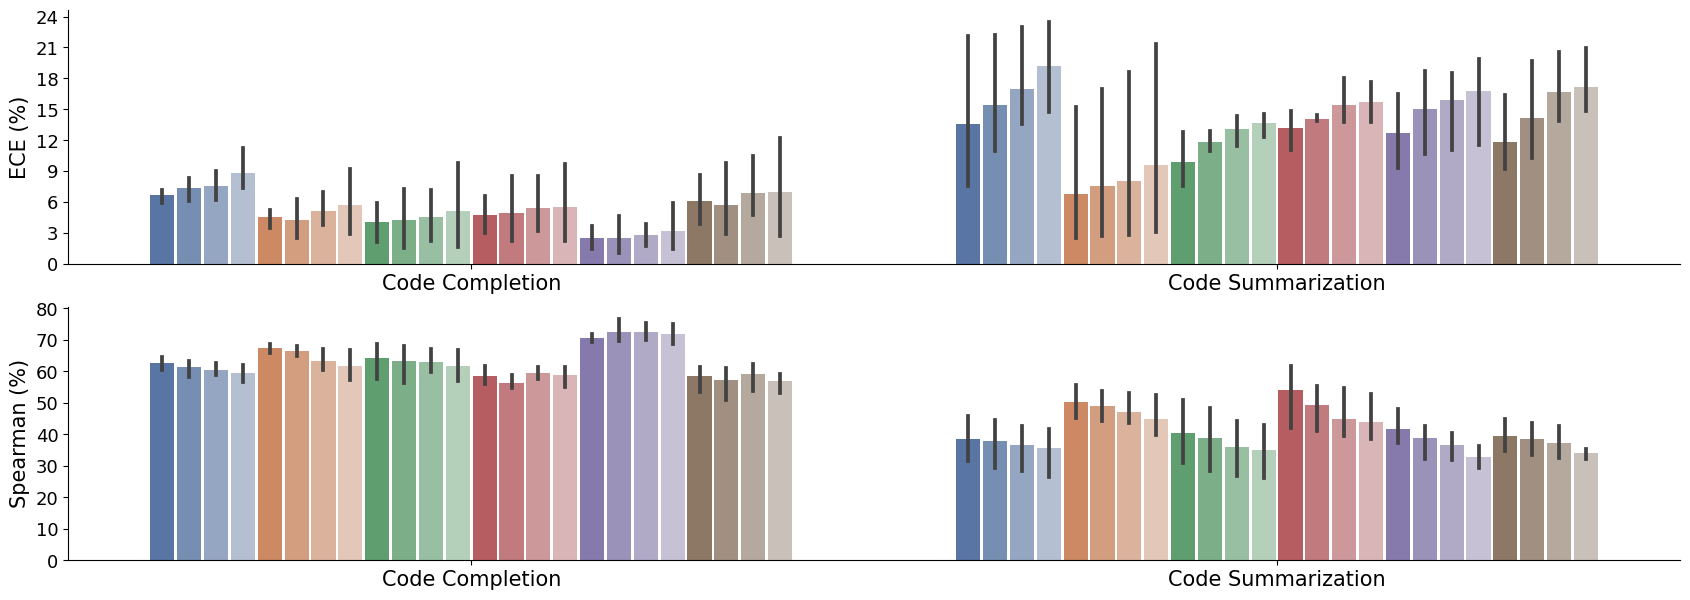

In [162]:
# Define the data as a dictionary
data = {
    'split': (['In-dist.'] * 6 + ['Shift 1'] * 6 + ['Shift 2'] * 6 + ['Shift 3'] * 6) * 3 * 2,
    'Correlation': [
        64.57, 68.57, 68.74, 61.63, 70.08, 53.41, # CC-time-in-dist
        63.26, 67.98, 68.18, 59.01, 76.73, 51.07, # CC-time-shift1
        62.73, 67.25, 67.13, 61.48, 75.24, 53.89, # CC-time-shift2
        61.97, 66.72, 66.73, 61.41, 75.06, 53.02, # CC-time-shift3
        63.52, 65.77, 66.02, 58.21, 71.96, 61.47, # CC-project-in-dist
        62.73, 64.94, 65.30, 55.52, 70.77, 59.78, # CC-project-shift1
        61.73, 62.75, 62.55, 59.80, 72.28, 62.47, # CC-project-shift2
        59.99, 61.45, 61.83, 60.37, 71.85, 58.17, # CC-project-shift3
        60.31, 68.15, 57.74, 56.08, 69.42, 60.39, # CC-author-in-dist
        58.16, 66.76, 56.44, 54.19, 69.62, 61.04, # CC-author-shift1
        57.30, 60.31, 59.73, 57.55, 70.13, 61.52, # CC-author-shift2
        56.76, 57.30, 56.89, 55.10, 68.70, 59.29, # CC-author-shift3
        
        38.54, 45.27, 50.94, 41.95, 40.04, 38.52, # CS-time-shift2
        39.92, 44.31, 48.43, 41.12, 42.67, 43.46, # CS-time-in-dist
        39.49, 43.65, 44.27, 40.56, 40.46, 42.55, # CS-time-shift1
        38.69, 42.09, 42.87, 40.14, 33.11, 34.82, # CS-time-shift3
        45.98, 49.88, 30.98, 61.67, 48.09, 44.88, # CS-project-shift2
        44.48, 48.66, 28.41, 51.78, 41.90, 39.12, # CS-project-in-dist
        42.57, 44.70, 26.76, 39.43, 37.49, 36.58, # CS-project-shift1
        41.71, 39.69, 25.98, 38.44, 36.44, 35.43, # CS-project-shift3
        31.46, 55.76, 39.35, 59.06, 37.27, 34.69, # CS-author-shift2
        29.29, 53.82, 39.38, 55.34, 32.24, 33.41, # CS-author-in-dist
        28.23, 53.24, 36.63, 54.67, 31.95, 32.47, # CS-author-shift1
        26.61, 52.65, 36.56, 52.78, 29.22, 32.20, # CS-author-shift3 
    ],
    'ECE': [
        6.88, 5.20, 4.24, 4.70, 2.44, 5.92, # CC-time-in-dist
        7.63, 3.85, 4.05, 3.99, 1.72, 4.30, # CC-time-shift1
        7.44, 4.72, 4.11, 4.39, 2.65, 5.86, # CC-time-shift2
        7.72, 4.98, 3.85, 4.59, 2.20, 5.84, # CC-time-shift3
        7.13, 4.91, 5.93, 6.61, 3.61, 8.58, # CC-project-in-dist
        8.36, 6.28, 7.25, 8.49, 4.65, 9.81, # CC-project-shift1
        8.99, 6.96, 7.12, 8.55, 3.87, 10.47, # CC-project-shift2
        11.22, 9.22, 9.73, 9.72, 5.90, 12.21, # CC-project-shift3
        5.87, 3.43, 2.06, 2.99, 1.44, 3.86, # CC-author-in-dist
        6.12, 2.49, 1.56, 2.21, 1.06, 2.92, # CC-author-shift1
        6.14, 3.71, 2.24, 3.20, 1.72, 4.13, # CC-author-shift3
        7.35, 2.84, 1.63, 2.21, 1.44, 2.73, # CC-author-shift3
        
        22.09, 2.67, 12.79, 13.74, 12.23, 16.40, # CS-time-in-dist
        22.18, 2.68, 12.90, 13.98, 15.85, 19.67, # CS-time-shift1
        22.95, 2.89, 13.56, 14.39, 18.53, 20.53, # CS-time-shift2
        23.47, 3.11, 14.17, 15.61, 18.77, 20.99, # CS-time-shift3
        7.52, 15.24, 7.51, 14.79, 9.27, 9.72, # CS-project-in-dist
        10.93, 16.97, 10.93, 14.48, 10.69, 10.31, # CS-project-shift1
        14.33, 18.58, 14.33, 17.99, 11.04, 13.84, # CS-project-shift2
        19.55, 21.37, 14.55, 17.64, 11.54, 14.83, # CS-project-shift3 
        10.98, 2.51, 9.27, 11.01, 16.53, 9.23, # CS-author-in-dist
        13.14, 2.96, 11.68, 13.82, 18.67, 12.48, # CS-author-shift1
        13.53, 2.74, 11.44, 13.72, 18.01, 15.55, # CS-author-shift2
        14.69, 4.25, 12.34, 13.76, 19.87, 15.75, # CS-author-shift3
    ],
    # 'Accuracy': [
    # ], 
    'Task': ['Code Completion'] * 6 * 12 + ['Code Summarization'] * 6 * 12,
    'method': (['Base-in', 'TS-in', 'MCD-in', 'DE-in', 'MT-in', 'DS-in'] + ['Base-1', 'TS-1', 'MCD-1', 'DE-1', 'MT-1', 'DS-1'] + ['Base-2', 'TS-2', 'MCD-2', 'DE-2', 'MT-2', 'DS-2'] + ['Base-3', 'TS-3', 'MCD-3', 'DE-3', 'MT-3', 'DS-3']) * 3 * 2,
    'shift': (['different_time'] * 24 + ['different_project'] * 24 + ['different_author'] * 24) * 2
}
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Use deep color palette
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.set_palette('deep')

# Follow the order of the method_order
for i, metric in enumerate(['ECE', 'Correlation']):
    sns.barplot(data=df, x='Task', y=metric, hue='method', hue_order=method_order, palette=color_palette, ax=axs[i])
    # Do not show top and right frame lines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_xticklabels(['Code Completion', 'Code Summarization'], fontsize=15)
    axs[i].set_ylabel(metric2y[metric], fontsize=15)
    axs[i].tick_params(axis='y', labelsize=13) # modify yticks fontsize
    axs[i].get_legend().remove() # remove legend
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True)) # keep only integer yticks
    width_changer(axs[i], .03)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for the legend
plt.savefig('../Figure/calibration_codegpt.pdf', bbox_inches='tight')
plt.show()

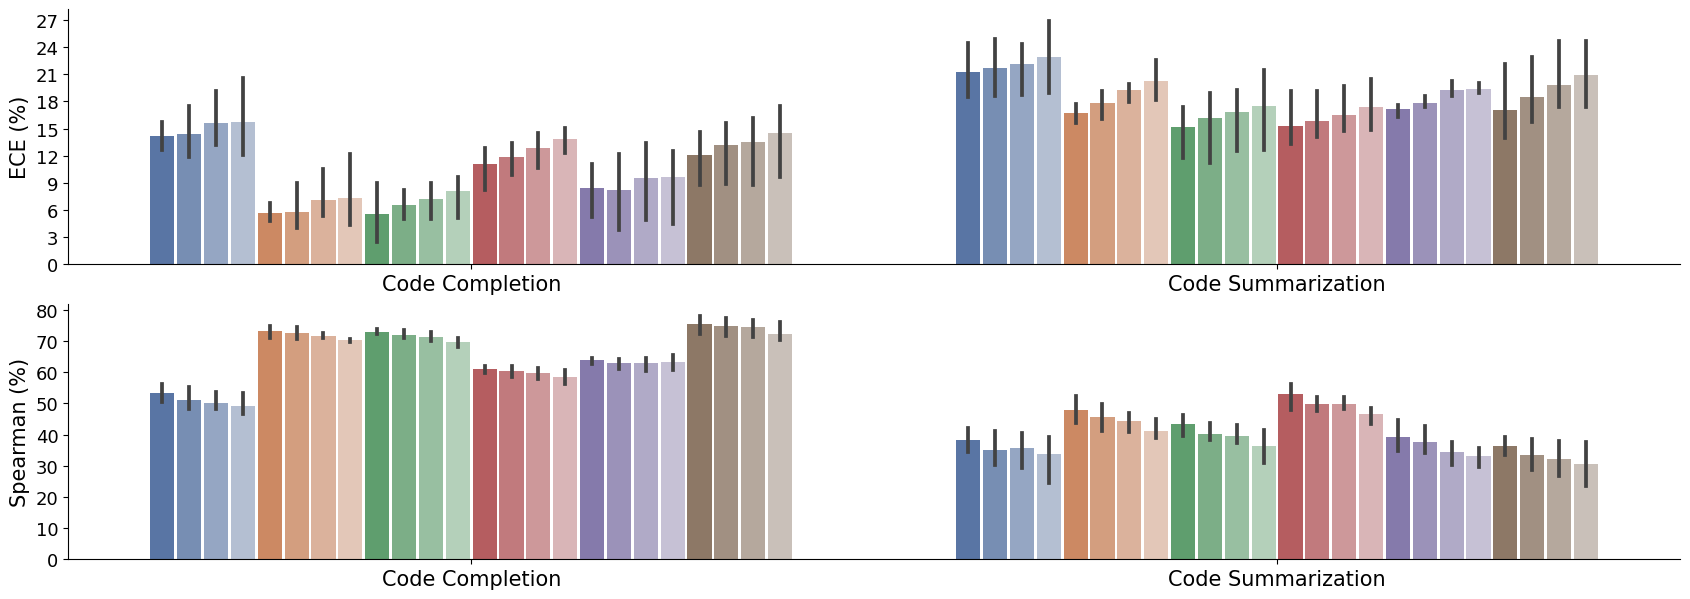

In [187]:
# Define the data as a dictionary
data = {
    'split': (['In-dist.'] * 6 + ['Shift 1'] * 6 + ['Shift 2'] * 6 + ['Shift 3'] * 6) * 3 * 2,
    'ECE': [
        14.25, 5.57, 8.96, 12.20, 5.27, 12.77, # CC-time-in-dist
        13.65, 4.30, 8.27, 13.44, 3.84, 15.23, # CC-time-shift1
        14.49, 5.45, 9.02, 14.51, 4.89, 16.21, # CC-time-shift2
        14.51, 5.29, 9.69, 14.28, 4.51, 17.48, # CC-time-shift3
        15.72, 6.82, 5.24, 8.23, 7.10, 14.65, # CC-project-in-dist
        17.53, 9.01, 6.36, 9.92, 8.57, 15.64, # CC-project-shift1
        19.13, 10.59, 7.55, 10.69, 10.14, 15.73, # CC-project-shift2
        20.57, 12.21, 9.62, 15.08, 11.82, 16.46, # CC-project-shift3
        12.65, 4.80, 2.51, 12.86, 12.98, 8.73, # CC-author-in-dist
        11.91, 4.05, 4.98, 12.22, 12.18, 8.84, # CC-author-shift1
        13.14, 5.35, 4.98, 13.36, 13.46, 8.78, # CC-author-shift2
        12.12, 4.37, 5.09, 12.26, 12.51, 9.62, # CC-author-shift3
        
        18.50, 18.49, 17.38, 19.11, 17.63, 22.15, # CS-time-in-dist
        18.61, 19.19, 18.97, 19.21, 17.64, 22.95, # CS-time-shift1
        18.76, 19.70, 18.69, 19.68, 18.88, 24.71, # CS-time-shift2
        18.95, 19.91, 18.48, 20.44, 18.96, 24.73, # CS-time-shift3
        20.96, 15.66, 11.72, 13.27, 16.31, 14.90, # CS-project-in-dist
        21.71, 16.07, 11.19, 14.13, 17.39, 15.69, # CS-project-shift1
        21.94, 17.94, 12.51, 15.09, 18.61, 17.46, # CS-project-shift2
        22.99, 18.19, 12.61, 16.98, 19.25, 20.61, # CS-project-shift3
        24.47, 16.09, 16.41, 13.38, 17.62, 13.98, # CS-author-in-dist
        24.93, 18.37, 18.42, 14.22, 18.63, 16.72, # CS-author-shift1
        25.57, 20.07, 19.32, 14.79, 20.24, 17.44, # CS-author-shift2
        26.88, 22.64, 21.46, 14.84, 20.07, 17.44, # CS-author-shift3
    ],
    'Correlation': [
        50.55, 74.68, 73.91, 61.98, 64.60, 76.28, # CC-time-in-dist
        48.10, 74.37, 73.43, 61.92, 64.27, 75.54, # CC-time-shift1
        48.20, 72.59, 72.99, 61.36, 64.52, 74.45, # CC-time-shift2
        46.72, 70.53, 71.07, 60.78, 65.49, 70.69, # CC-time-shift3
        50.90, 73.96, 72.75, 61.55, 63.96, 72.12, # CC-project-in-dist
        50.38, 72.49, 71.26, 60.47, 63.40, 71.62, # CC-project-shift1
        48.17, 71.78, 70.16, 60.28, 63.79, 71.23, # CC-project-shift2
        47.41, 70.30, 70.22, 58.37, 63.25, 70.27, # CC-project-shift3
        58.99, 71.05, 72.20, 59.77, 62.74, 77.99, # CC-author-in-dist
        55.24, 70.56, 70.81, 58.46, 61.00, 77.34, # CC-author-shift1
        53.56, 70.86, 70.36, 57.71, 60.51, 77.75, # CC-author-shift2
        53.45, 69.76, 68.00, 56.08, 60.71, 76.23, # CC-author-shift3
        
        42.21, 43.62, 44.39, 48.02, 34.75, 39.22, # CS-time-in-dist
        41.01, 41.28, 43.60, 47.68, 34.07, 38.69, # CS-time-shift1
        40.64, 40.72, 43.01, 48.08, 30.21, 38.02, # CS-time-shift2
        39.18, 38.80, 41.43, 48.09, 29.75, 37.53, # CS-time-shift3
        38.45, 47.26, 46.23, 56.10, 44.77, 33.37, # CS-project-in-dist
        34.23, 45.41, 39.16, 49.96, 42.59, 28.68, # CS-project-shift1
        37.16, 43.56, 37.96, 49.67, 37.72, 26.55, # CS-project-shift2
        37.56, 39.83, 31.01, 43.52, 35.83, 23.60, # CS-project-shift3
        34.38, 52.46, 39.69, 54.97, 37.94, 36.01, # CS-author-in-dist
        30.13, 49.75, 38.13, 52.02, 36.30, 33.18, # CS-author-shift1
        29.14, 48.40, 37.28, 51.90, 35.19, 32.01, # CS-author-shift2
        24.48, 45.02, 36.97, 48.49, 33.77, 30.60, # CS-author-shift3
    ],
    # 'Accuracy': [
    # ], 
    'Task': ['Code Completion'] * 6 * 12 + ['Code Summarization'] * 6 * 12,
    'method': (['Base-in', 'TS-in', 'MCD-in', 'DE-in', 'MT-in', 'DS-in'] + ['Base-1', 'TS-1', 'MCD-1', 'DE-1', 'MT-1', 'DS-1'] + ['Base-2', 'TS-2', 'MCD-2', 'DE-2', 'MT-2', 'DS-2'] + ['Base-3', 'TS-3', 'MCD-3', 'DE-3', 'MT-3', 'DS-3']) * 3 * 2,
    'shift': (['different_time'] * 24 + ['different_project'] * 24 + ['different_author'] * 24) * 2
}
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Use deep color palette
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.set_palette('deep')

# Follow the order of the method_order
for i, metric in enumerate(['ECE', 'Correlation']):
    sns.barplot(data=df, x='Task', y=metric, hue='method', hue_order=method_order, palette=color_palette, ax=axs[i])
    # Do not show top and right frame lines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_xticklabels(['Code Completion', 'Code Summarization'], fontsize=15)
    axs[i].set_ylabel(metric2y[metric], fontsize=15)
    axs[i].tick_params(axis='y', labelsize=13) # modify yticks fontsize
    axs[i].get_legend().remove() # remove legend
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True)) # keep only integer yticks
    width_changer(axs[i], .03)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for the legend
plt.savefig('../Figure/calibration_codebert.pdf', bbox_inches='tight')
plt.show()

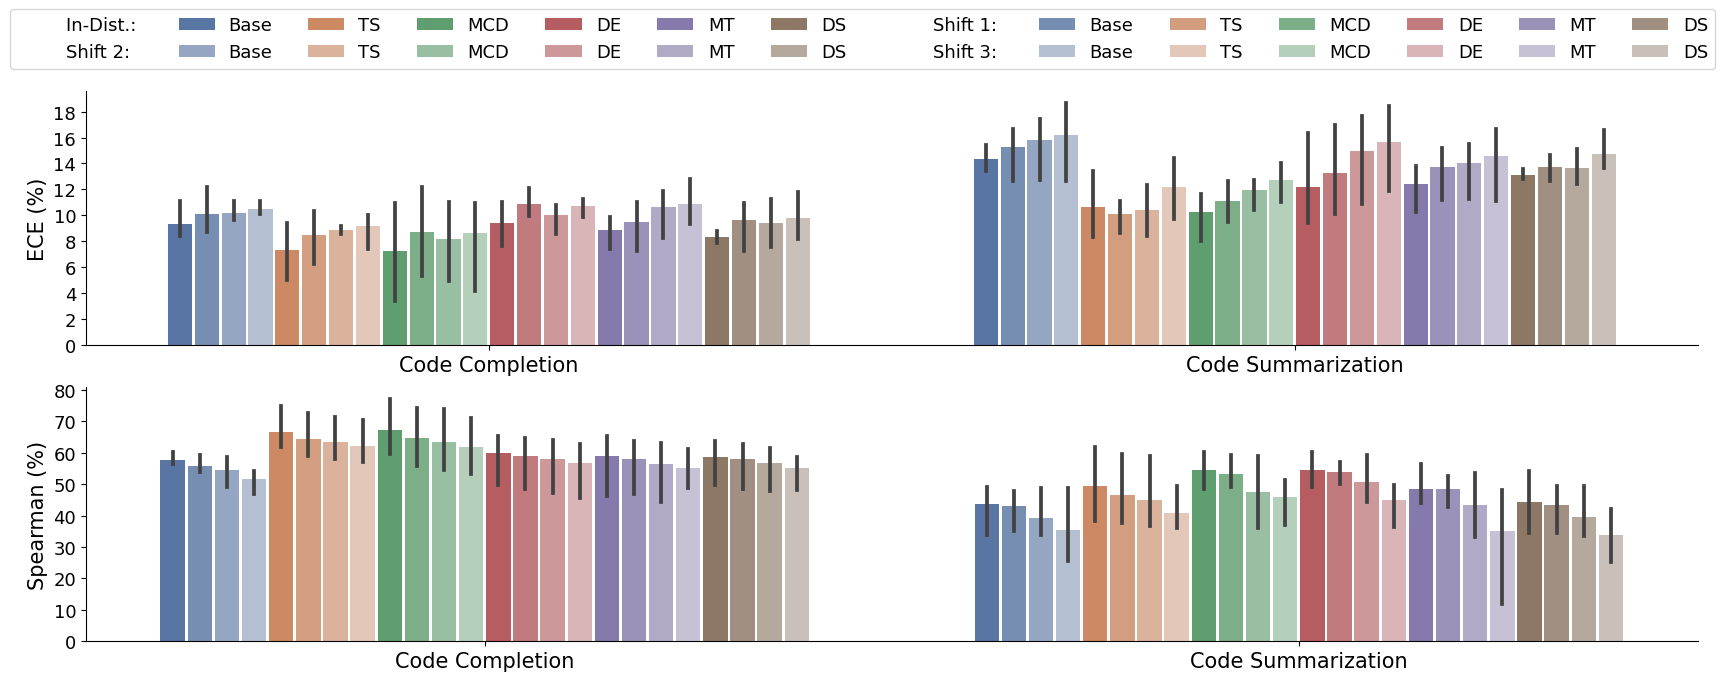

In [183]:
# Define the data as a dictionary
data = {
    'split': (['In-dist.'] * 6 + ['Shift 1'] * 6 + ['Shift 2'] * 6 + ['Shift 3'] * 6) * 3 * 2,
    'Correlation': [
        56.43, 62.54, 59.72, 49.84, 46.08, 49.58, # CC-time-in-dist
        54.79, 61.34, 55.83, 48.48, 46.71, 48.52, # CC-time-shift1
        49.19, 60.94, 54.42, 47.24, 44.27, 47.86, # CC-time-shift2
        46.91, 59.24, 53.07, 45.73, 43.03, 47.98, # CC-time-shift3
        56.40, 61.84, 64.86, 65.27, 65.13, 62.91, # CC-project-in-dist
        53.77, 59.00, 63.71, 64.65, 63.41, 62.68, # CC-project-shift1
        55.87, 58.11, 61.70, 63.91, 62.01, 60.98, # CC-project-shift2
        53.56, 56.91, 60.92, 62.79, 61.05, 58.38, # CC-project-shift3
        60.24, 74.94, 76.95, 64.92, 65.32, 63.79, # CC-author-in-dist
        59.17, 72.51, 74.30, 63.43, 63.63, 62.72, # CC-author-shift1
        58.73, 71.20, 73.94, 63.14, 63.22, 61.38, # CC-author-shift2
        54.17, 70.25, 70.98, 61.32, 61.32, 58.71, # CC-author-shift3
        
        33.96, 38.13, 48.56, 48.96, 44.03, 34.37, # CS-time-in-dist
        35.04, 37.49, 49.16, 49.89, 42.85, 34.35, # CS-time-shift2
        33.80, 36.57, 47.38, 48.81, 43.31, 33.47, # CS-time-shift1
        32.13, 36.17, 48.77, 48.87, 45.92, 33.86, # CS-time-shift3
        47.84, 48.28, 54.37, 54.18, 44.87, 44.30, # CS-project-in-dist
        44.86, 42.41, 50.83, 54.05, 46.72, 46.52, # CS-project-shift2
        35.13, 39.54, 35.92, 44.23, 33.23, 35.53, # CS-project-shift1
        25.61, 36.32, 37.12, 36.51, 11.78, 25.19, # CS-project-shift3
        49.18, 61.82, 60.32, 60.14, 56.53, 54.08, # CS-author-in-dist
        49.30, 59.53, 59.25, 57.18, 55.65, 49.28, # CS-author-shift1
        48.64, 58.93, 59.01, 59.14, 53.48, 49.49, # CS-author-shift2
        48.63, 49.54, 51.38, 49.59, 48.01, 41.95, # CS-author-shift3
        
    ],
    'ECE': [
        8.43, 5.03, 3.42, 7.67, 7.43, 8.82, # CC-time-in-dist
        9.34, 8.82, 5.33, 9.96, 7.26, 10.97, # CC-time-shift1
        9.93, 9.20, 4.90, 8.58, 8.29, 9.51, # CC-time-shift2
        10.14, 10.03, 4.18, 9.86, 9.37, 9.50, # CC-time-shift3
        8.43, 9.42, 7.37, 9.55, 9.33, 8.37, # CC-project-in-dist
        8.73, 10.36, 8.59, 10.58, 11.04, 10.73, # CC-project-shift1
        9.63, 8.90, 8.62, 10.79, 11.84, 11.29, # CC-project-shift2
        10.08, 10.01, 10.66, 11.11, 12.82, 11.78, # CC-project-shift3
        11.14, 7.57, 10.95, 11.05, 9.86, 7.89, # CC-author-in-dist
        12.21, 6.26, 12.19, 12.12, 10.09, 7.23, # CC-author-shift1
        11.07, 8.59, 11.02, 10.82, 11.71, 7.52, # CC-author-shift2
        11.14, 7.40, 10.99, 11.24, 10.54, 8.17, # CC-author-shift3
        
        13.44, 8.31, 11.63, 10.75, 10.29, 13.61, # CS-time-in-dist
        12.63, 8.65, 11.05, 12.75, 11.15, 13.78, # CS-time-shift1
        12.70, 8.44, 12.71, 16.27, 11.23, 13.53, # CS-time-shift2
        12.63, 9.75, 13.04, 16.61, 11.13, 13.63, # CS-time-shift3
        15.41, 10.21, 11.14, 16.35, 13.06, 12.79, # CS-project-in-dist
        16.66, 10.47, 12.66, 16.94, 15.16, 14.65, # CS-project-shift1
        17.41, 12.36, 12.68, 17.64, 15.44, 15.11, # CS-project-shift2
        17.30, 12.27, 14.06, 18.44, 15.88, 16.59, # CS-project-shift3
        14.26, 13.40, 8.02, 9.40, 13.83, 12.95, # CS-author-in-dist
        16.55, 11.13, 9.51, 10.14, 14.89, 12.68, # CS-author-shift1
        17.24, 10.54, 10.44, 10.90, 15.49, 12.38, # CS-author-shift2
        18.66, 14.44, 11.04, 11.91, 16.68, 14.06, # CS-author-shift3
    ],
    'Accuracy': [
        45.00, 45.00, 48.00, 49.66, 48.06, 48.02, # CC-time-in-dist
        44.28, 44.28, 46.28, 47.54, 46.30, 46.28, # CC-time-shift1
        43.80, 43.80, 48.77, 49.86, 48.80, 46.41, # CC-time-shift2
        42.15, 42.15, 47.15, 48.60, 47.15, 47.25, # CC-time-shift3
        46.43, 46.43, 48.00, 48.78, 48.00, 48.49, # CC-project-in-dist
        46.27, 46.27, 47.41, 48.10, 47.47, 47.63, # CC-project-shift1
        45.14, 45.14, 45.77, 45.28, 45.86, 45.62, # CC-project-shift2
        42.11, 42.11, 42.76, 43.27, 43.02, 42.29, # CC-project-shift3
        51.20, 51.20, 59.17, 59.85, 59.20, 59.18, # CC-author-in-dist 
        50.21, 50.21, 58.14, 58.74, 58.21, 57.14, # CC-author-shift1
        49.95, 49.95, 54.90, 55.56, 54.95, 56.19, # CC-author-shift2
        48.68, 48.68, 59.64, 60.28, 59.68, 55.98, # CC-author-shift3
        
        30.37, 30.37, 34.79, 37.98, 32.94, 39.56, # CS-time-in-dist
        30.69, 30.69, 35.68, 38.74, 33.47, 41.49, # CS-time-shift1
        30.51, 30.51, 36.04, 39.11, 33.51, 41.03, # CS-time-shift2
        30.80, 30.80, 36.11, 39.17, 33.50, 41.00, # CS-time-shift3
        34.61, 34.61, 39.64, 46.87, 37.21, 43.64, # CS-project-in-dist
        30.04, 30.04, 35.55, 45.55, 33.44, 39.82, # CS-project-shift1
        32.58, 32.58, 35.82, 40.84, 34.14, 38.34, # CS-project-shift2
        16.53, 16.53, 29.02, 32.31, 27.48, 26.89, # CS-project-shift3
        39.65, 39.65, 44.24, 50.29, 41.52, 44.83, # CS-author-in-dist
        37.13, 37.13, 42.43, 49.93, 39.74, 44.50, # CS-author-shift1
        36.60, 36.60, 41.46, 49.05, 38.93, 44.08, # CS-author-shift2
        29.33, 29.33, 34.10, 40.29, 31.47, 36.11, # CS-author-shift3
    ], 
    'Task': ['Code Completion'] * 6 * 12 + ['Code Summarization'] * 6 * 12,
    'method': (['Base-in', 'TS-in', 'MCD-in', 'DE-in', 'MT-in', 'DS-in'] + ['Base-1', 'TS-1', 'MCD-1', 'DE-1', 'MT-1', 'DS-1'] + ['Base-2', 'TS-2', 'MCD-2', 'DE-2', 'MT-2', 'DS-2'] + ['Base-3', 'TS-3', 'MCD-3', 'DE-3', 'MT-3', 'DS-3']) * 3 * 2,
    'shift': (['different_time'] * 24 + ['different_project'] * 24 + ['different_author'] * 24) * 2
}
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Use deep color palette
fig, axs = plt.subplots(2, 1, figsize=(17, 7))
sns.set_palette('deep')

# Follow the order of the method_order
for i, metric in enumerate(['ECE', 'Correlation']):
    sns.barplot(data=df, x='Task', y=metric, hue='method', hue_order=method_order, palette=color_palette, ax=axs[i])
    # Do not show top and right frame lines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlabel('')
    axs[i].set_xticklabels(['Code Completion', 'Code Summarization'], fontsize=15)
    axs[i].set_ylabel(metric2y[metric], fontsize=15)
    axs[i].tick_params(axis='y', labelsize=13) # modify yticks fontsize
    axs[i].get_legend().remove() # remove legend
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True)) # keep only integer yticks
    width_changer(axs[i], .03)

new_l = (['Base'] * 2 + ['TS'] * 2 + ['MCD'] * 2 + ['DE'] * 2 + ['MT'] * 2 + ['DS'] * 2) * 2
h, l = axs[0].get_legend_handles_labels()  # Get handles and labels from the last subplot in the first row
ph = [plt.plot([], marker="", ls="")[0]]*4
handles = ph[:2] + h[::2] + ph[2:] + h[1::2]  # Split the handles for two rows 
labels = ["In-Dist.: "] + ["Shift 2: "] + new_l[:12] + \
         ["Shift 1: "] + ["Shift 3: "] + new_l[12:]  # Split the labels for two rows
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.50, 0.98), ncol=14, fontsize=13)
for vpack in leg._legend_handle_box.get_children()[:2]:  # Adjust the handle length in two rows
    for hpack in vpack.get_children():
        hpack.get_children()[0].set_width(25)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for the legend
plt.savefig('../Figure/calibration_code2vec.pdf', bbox_inches='tight')
plt.show()

### ECE

In [4]:
metric = 'ece'
SHIFT = 'different_project'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False,  True, ..., False, False,  True]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True,  True]), 'test2': array([ True, False, False, ..., False, False, False]), 'test3': array([False, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.1643669158220291]
ModelWithTemperature acc:  [0.01967109926044941]
ModelActivateDropout acc:  [0.16181790828704834]
Ensemble acc:  [0.3434523344039917]
PVScore acc:  [0.07773788273334503]
Mutation acc:  [0.13879753649234772, 0.1798727661371231, 0.16160811483860016, 0.17633403837680817]
 -- test1 set -- 
Vanilla acc:  [0.15124209225177765]
ModelWithTemperature acc:  [0.0308354664593935]
ModelActivateDropout acc:  [0.15336085855960846]
Ensemble acc:  [0.33661365509033203]
PVScore acc:  [0.0900840163230896]
Mutation acc:  [0.1512485146522522, 0.16780906915664673, 0.17186200618743896, 0.16539916396141052]
 -- test2 set -- 
Vanilla acc:  [0

In [5]:
metric = 'ece'
SHIFT = 'different_author'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False,  True,  True, ..., False, False, False]), 'dev': array([False, False, False, ..., False, False, False]), 'test1': array([ True, False, False, ..., False,  True, False]), 'test2': array([False, False,  True, ..., False,  True, False]), 'test3': array([ True, False, False, ..., False, False, False])}
 -- dev set -- 
Vanilla acc:  [0.11692759394645691]
ModelWithTemperature acc:  [0.3083134889602661]
ModelActivateDropout acc:  [0.11650010943412781]
Ensemble acc:  [0.30626410245895386]
PVScore acc:  [0.08199311792850494]
Mutation acc:  [0.2769222557544708, 0.19353307783603668, 0.17266878485679626, 0.19418296217918396]
 -- test1 set -- 
Vanilla acc:  [0.13434535264968872]
ModelWithTemperature acc:  [0.2921929359436035]
ModelActivateDropout acc:  [0.13399481773376465]
Ensemble acc:  [0.3423263728618622]
PVScore acc:  [0.10970602929592133]
Mutation acc:  [0.3847420811653137, 0.21052400767803192, 0.22817043960094452, 0.21127787232398987]
 -- test2 set -- 
Vanilla acc:  [

In [6]:
metric = 'ece'
SHIFT = 'different_time'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
print(truth)
for split in ['dev', 'test1', 'test2', 'test3']:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} acc: ', method_dict[split][metric])

{'train': array([False, False, False, ..., False, False, False]), 'dev': array([ True,  True, False, ...,  True, False, False]), 'test1': array([ True, False, False, ...,  True,  True, False]), 'test2': array([False, False,  True, ..., False,  True, False]), 'test3': array([ True, False, False, ...,  True,  True, False])}
 -- dev set -- 
Vanilla acc:  [0.23848000168800354]
ModelWithTemperature acc:  [0.26534125208854675]
ModelActivateDropout acc:  [0.235673725605011]
Ensemble acc:  [0.3693715035915375]
PVScore acc:  [0.03847803920507431]
Mutation acc:  [0.08224757760763168, 0.2746717035770416, 0.26711899042129517, 0.27845263481140137]
 -- test1 set -- 
Vanilla acc:  [0.24182304739952087]
ModelWithTemperature acc:  [0.2662917971611023]
ModelActivateDropout acc:  [0.23966474831104279]
Ensemble acc:  [0.36852312088012695]
PVScore acc:  [0.03895222395658493]
Mutation acc:  [0.1421203464269638, 0.2797715365886688, 0.2734624743461609, 0.2825488746166229]
 -- test2 set -- 
Vanilla acc:  [0.22

In [59]:
import os
import torch

metric = 'ece'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
# print(truth)
for split in ['dev', 'test',]:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} {metric}: ', method_dict[split][metric])

 -- dev set -- 
Vanilla ece:  [0.18938204646110535]
ModelWithTemperature ece:  [0.296676367521286]
ModelActivateDropout ece:  [0.1741599440574646]
Ensemble ece:  [0.24074795842170715]
PVScore ece:  [0.11394196003675461]
Mutation ece:  [0.24116456508636475, 0.17829552292823792, 0.18107354640960693, 0.1812986135482788]
 -- test set -- 
Vanilla ece:  [0.3410862982273102]
ModelWithTemperature ece:  [0.7770695686340332]
ModelActivateDropout ece:  [0.34832093119621277]
Ensemble ece:  [0.1268780678510666]
PVScore ece:  [0.5846804976463318]
Mutation ece:  [0.3678699731826782, 0.2956947386264801, 0.2547959089279175, 0.290801078081131]


In [66]:
import os
import torch

metric = 'ece'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
# print(truth)
for split in ['dev', 'test',]:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} {metric}: ', method_dict[split][metric])

 -- dev set -- 
Vanilla ece:  [0.06201038509607315]
ModelWithTemperature ece:  [0.10615512728691101]
ModelActivateDropout ece:  [0.06201039254665375]
Ensemble ece:  [0.06713002175092697]
PVScore ece:  [0.10568079352378845]
Mutation ece:  [0.04658883064985275, 0.05385817587375641, 0.08026939630508423, 0.049274563789367676]
 -- test set -- 
Vanilla ece:  [0.07950504869222641]
ModelWithTemperature ece:  [0.08733075112104416]
ModelActivateDropout ece:  [0.07950499653816223]
Ensemble ece:  [0.06327833980321884]
PVScore ece:  [0.1311255395412445]
Mutation ece:  [0.07362037897109985, 0.04289965331554413, 0.054988592863082886, 0.04084017500281334]


### Correlation

In [64]:
import os
import torch

metric = 'rank_correlation'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeSummary_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
# print(truth)
for split in ['dev', 'test',]:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} {metric}: ', method_dict[split][metric])

 -- dev set -- 
Vanilla rank_correlation:  [-0.06597843235331609]
ModelWithTemperature rank_correlation:  [-0.11884829726476631]
ModelActivateDropout rank_correlation:  [-0.1071889575327691, 0.044193749124999716, 0.03308674336207575]
Ensemble rank_correlation:  [0.3337616731002336, -0.0911472107413353, 0.17356842707427556]
PVScore rank_correlation:  [0.2740381332114799, nan, 0.2740381332114799]
Mutation rank_correlation:  [0.22662360819558153, nan, 0.18722225090684405, 0.13819763237634855]
 -- test set -- 
Vanilla rank_correlation:  [0.1454322191434662]
ModelWithTemperature rank_correlation:  [0.09247819102472084]
ModelActivateDropout rank_correlation:  [-0.007704414754332012, 0.0878429583875068, 0.07934919106014166]
Ensemble rank_correlation:  [0.5843754902673644, -0.29585163305220635, 0.34814752131797905]
PVScore rank_correlation:  [0.20727518283611598, nan, 0.20727518283611598]
Mutation rank_correlation:  [0.2325205174241452, nan, 0.15696287302215203, 0.13251446962391758]


In [65]:
import os
import torch

metric = 'rank_correlation'
SHIFT = 'case_study'
dir = f'../Uncertainty_Results/{SHIFT}/codellama/CodeCompletion_Module'
truth = torch.load(os.path.join(dir, 'truth.res'))
METHODS = ['Vanilla', 'ModelWithTemperature', 'ModelActivateDropout', 'Ensemble', 'PVScore', 'Mutation']
# print(truth)
for split in ['dev', 'test',]:
    print(f" -- {split} set -- ")
    for method in METHODS:
        method_dict = torch.load(os.path.join(dir, f'{method}.res'))
        print(f'{method} {metric}: ', method_dict[split][metric])

 -- dev set -- 
Vanilla rank_correlation:  [0.5896126533615617]
ModelWithTemperature rank_correlation:  [0.5832910533403396]
ModelActivateDropout rank_correlation:  [0.5896124234993066, -0.40538613639825277, -0.0061394034819168665]
Ensemble rank_correlation:  [0.5833183785170923, 0.2958142778351884, 0.42585408533622554]
PVScore rank_correlation:  [0.4874212999720064, 0.4873280994132839, 0.484653919877009]
Mutation rank_correlation:  [0.44205158633592606, nan, 0.5035441470854372, 0.1039569438086563]
 -- test set -- 
Vanilla rank_correlation:  [0.5909535265368945]
ModelWithTemperature rank_correlation:  [0.5912469172937621]
ModelActivateDropout rank_correlation:  [0.5909519651050349, -0.4167078966490795, 0.005364971794907309]
Ensemble rank_correlation:  [0.5802141647915832, 0.3306458242251052, 0.46018115168838775]
PVScore rank_correlation:  [0.5604431796892358, 0.5602881633063834, 0.5557410618100642]
Mutation rank_correlation:  [0.5568134503112131, nan, 0.35185641125046985, 0.12998633512

In [1]:
import numpy as np
# res = {
#     'Base': [48.04, 47.82, 46.98, 46.89],
#     'MCD': [48.83, 48.57, 47.87, 47.38],
#     'DE': [49.58, 49.54, 48.66, 48.63],
#     'MT': [48.20, 47.95, 47.14, 47.24],
#     'DS': [48.30, 48.42, 48.27, 47.51],
# }
# res = {
#     'Base': [53.64, 52.86, 48.63, 46.84],
#     'MCD': [54.53, 54.13, 49.12, 47.24],
#     'DE': [54.46, 53.44, 49.91, 48.80],
#     'MT': [54.12, 53.02, 48.65, 47.99],
#     'DS': [53.46, 52.79, 48.89, 47.02],
# }
res = {
    'Base': [50.94, 49.32, 48.13, 44.50],
    'MCD': [51.87, 50.29, 48.30, 46.82],
    'DE': [51.17, 49.99, 48.74, 46.23],
    'MT': [50.95, 49.37, 48.14, 45.54],
    'DS': [51.02, 49.43, 48.24, 46.07],
}
# res = {
#     'Base': [59.63, 69.47, 22.67],
#     'TS': [60.18, 70.30, 25.84],
#     'MCD-SWS': [64.84, 72.80, 24.27],
#     'MCD-PV': [65.06, 74.25, 22.13],
#     'MCD-BALD': [67.79, 71.81, 24.03],
#     'DE-SWS': [63.97, 78.94, 25.78],
#     'DE-PV': [62.45, 80.81, 28.01],
#     'DE-BALD': [61.92, 79.30, 26.33],
#     'MT-GF': [75.38, 83.42, 17.81],
#     'MT-WS': [73.80, 85.65, 19.49],
#     'DS-Linear': [68.62, 79.27, 21.35],
#     'DS-Log': [66.73, 80.39, 22.73],
#     'DS-Exp': [67.46, 81.08, 22.16],
# }

# Calculate the average scores for each method and display
print("Average scores: ")
for method, scores in res.items():
    print(f'{method}: {sum(scores) / len(scores)}')
    
# Calculate the average of ranks regarding each column and display
def calculate_ranks(scores):
    # For each test set, calculate the ranks
    ranks = {method: [] for method in scores}
    for i in range(len(scores['Base'])):  # Four test sets
        if i != len(scores['Base']) - 1:
            sorted_methods = sorted(scores.items(), key=lambda x: x[1][i], reverse=True)
        else:
            sorted_methods = sorted(scores.items(), key=lambda x: x[1][i])
        for rank, method in enumerate(sorted_methods, start=1):
            ranks[method[0]].append(rank)
    return ranks

ranks = calculate_ranks(res)
avg_ranks = {method: np.mean(ranks) for method, ranks in ranks.items()}
avg_ranks

Average scores: 
Base: 48.2225
MCD: 49.31999999999999
DE: 49.0325
MT: 48.49999999999999
DS: 48.69


{'Base': 4.0, 'MCD': 2.25, 'DE': 2.25, 'MT': 3.5, 'DS': 3.0}

In [2]:
import pandas as pd
import numpy as np

# Data from the table provided
data = {
    'Method': ['Base', 'TS', 'MCD', 'DE', 'MT', 'DS'],
    'CC_F1': [55.48, 55.48, 57.18, 58.79, 56.86, 57.04],
    'CC_ECE': [17.95, 18.73, 17.95, 16.32, 14.29, 23.11],
    'CC_Corr': [55.68, 58.33, 58.96, 58.33, 55.68, 56.04],
    'CS_F1': [29.99, 29.99, 33.32, 35.15, 30.12, 30.19],
    'CS_ECE': [34.11, 29.67, 24.83, 12.69, 25.48, 28.47],
    'CS_Corr': [14.54, 21.88, 30.72, 33.38, 22.66, 27.40]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate rankings for F-1 and Correlation (higher is better)
for metric in ['CC_F1', 'CC_Corr', 'CS_F1', 'CS_Corr']:
    df[metric + '_Rank'] = df[metric].rank(method='average', ascending=False)

# Calculate rankings for ECE (lower is better)
for metric in ['CC_ECE', 'CS_ECE']:
    df[metric + '_Rank'] = df[metric].rank(method='average', ascending=True)

# Calculate average rank across all metrics
df['Average_Rank_CC'] = df[['CC_F1_Rank', 'CC_ECE_Rank', 'CC_Corr_Rank']].mean(axis=1)
df['Average_Rank_CS'] = df[['CS_F1_Rank', 'CS_ECE_Rank', 'CS_Corr_Rank']].mean(axis=1)
df['Overall_Average_Rank'] = df[['Average_Rank_CC', 'Average_Rank_CS']].mean(axis=1)

# Show the DataFrame with the ranks
df[['Method', 'Average_Rank_CC', 'Average_Rank_CS', 'Overall_Average_Rank']]


,Method,Average_Rank_CC,Average_Rank_CS,Overall_Average_Rank
0,Base,4.833333,5.833333,5.333333
1,TS,4.333333,5.166667,4.750000
2,MCD,2.166667,2.000000,2.083333
3,DE,1.833333,1.000000,1.416667
4,MT,3.500000,3.666667,3.583333
5,DS,4.333333,3.333333,3.833333


In [14]:
import numpy as np
data = {
    'Code2Vec': {
        'Code Completion': {
            'Base / TS': [51.20, 50.21, 49.95, 48.68], 
            'MCD': [59.64, 59.17, 58.14, 54.90], 
            'DE': [60.28, 59.85, 58.74, 55.56], 
            'MT': [59.68, 59.20, 58.21, 54.95], 
            'DS': [59.18, 57.14, 56.19, 55.98]
        },
        'Code Summarization': {
            'Base / TS': [39.65, 37.13, 36.60, 29.33], 
            'MCD': [44.24, 42.43, 41.46, 34.10], 
            'DE': [50.29, 49.93, 49.05, 40.29], 
            'MT': [41.52, 39.74, 38.93, 31.47], 
            'DS': [44.83, 44.50, 44.08, 36.11]
        }
    },
    'CodeBERT': {
        'Code Completion': {
            'Base / TS': [72.40, 72.11, 71.37, 69.27], 
            'MCD': [73.52, 72.14, 72.37, 71.41], 
            'DE': [74.25, 73.93, 73.19, 71.50], 
            'MT': [72.40, 72.11, 71.37, 69.27], 
            'DS': [75.24, 74.41, 74.42, 73.40]
        },
        'Code Summarization': {
            'Base / TS': [48.57, 46.00, 45.26, 41.98], 
            'MCD': [51.41, 48.91, 47.19, 43.46], 
            'DE': [53.27, 48.33, 46.22, 42.72], 
            'MT': [48.72, 46.31, 45.26, 41.98], 
            'DS': [50.71, 49.39, 48.15, 44.69]
        }
    },
    'CodeGPT': {
        'Code Completion': {
            'Base / TS': [75.28, 74.87, 74.03, 72.24], 
            'MCD': [77.29, 76.93, 76.15, 75.40], 
            'DE': [76.62, 76.13, 75.21, 73.86], 
            'MT': [75.31, 74.96, 74.04, 72.28], 
            'DS': [77.44, 76.90, 76.52, 75.15]
        },
        'Code Summarization': {
            'Base / TS': [50.31, 47.49, 47.62, 42.62], 
            'MCD': [50.89, 49.73, 48.46, 46.58], 
            'DE': [56.55, 53.92, 53.68, 48.94], 
            'MT': [50.67, 47.94, 47.78, 43.10], 
            'DS': [50.98, 49.43, 48.27, 44.74]
        }
    }
}


# Calculate average accuracies for each method and task
avg_accuracies = {framework: {task: {method: sum(scores)/len(scores) for method, scores in methods.items()} for task, methods in tasks.items()} for framework, tasks in data.items()}
# Calculate the average of ranks regarding each column and display

def calculate_ranks(scores):
    # For each test set, calculate the ranks
    ranks = {method: [] for method in scores}
    for i in range(len(scores['Base / TS'])):  # Four test sets
        sorted_methods = sorted(scores.items(), key=lambda x: x[1][i], reverse=True)
        for rank, method in enumerate(sorted_methods, start=1):
            ranks[method[0]].append(rank)
    return ranks

avg_rankings = {framework: {task: {k: np.mean(v) for k,v in calculate_ranks(tasks[task]).items()} for task in tasks} for framework, tasks in data.items()}

# avg_accuracies
# avg_rankings
avg = {framework: {task: {k: (avg_accuracies[framework][task][k], avg_rankings[framework][task][k]) for k in avg_accuracies[framework][task]} for task in avg_accuracies[framework]} for framework in avg_accuracies}
avg

{'Code2Vec': {'Code Completion': {'Base / TS': (50.010000000000005, 5.0),
   'MCD': (57.9625, 3.25),
   'DE': (58.6075, 1.25),
   'MT': (58.010000000000005, 2.25),
   'DS': (57.122499999999995, 3.25)},
  'Code Summarization': {'Base / TS': (35.677499999999995, 5.0),
   'MCD': (40.5575, 3.0),
   'DE': (47.38999999999999, 1.0),
   'MT': (37.915, 4.0),
   'DS': (42.379999999999995, 2.0)}},
 'CodeBERT': {'Code Completion': {'Base / TS': (71.2875, 4.0),
   'MCD': (72.36, 3.0),
   'DE': (73.2175, 2.0),
   'MT': (71.2875, 5.0),
   'DS': (74.3675, 1.0)},
  'Code Summarization': {'Base / TS': (45.45249999999999, 4.5),
   'MCD': (47.7425, 2.0),
   'DE': (47.635, 2.5),
   'MT': (45.567499999999995, 4.5),
   'DS': (48.235, 1.5)}},
 'CodeGPT': {'Code Completion': {'Base / TS': (74.105, 5.0),
   'MCD': (76.44250000000001, 1.5),
   'DE': (75.455, 3.0),
   'MT': (74.14750000000001, 4.0),
   'DS': (76.5025, 1.5)},
  'Code Summarization': {'Base / TS': (47.010000000000005, 5.0),
   'MCD': (48.9150000000